In [1]:
# imports
import market_status as ms
from IPython.display import display_html
import pandas as pd
import datetime as dt
import os

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

**Stuff to implement**
- Options status for major indices
- Distribution days for indices (based on the "How to Make Money in Stocks" book)
- ~~Add Nasdaq to indices overview (remove double stochastic, keep only VFI)~~
- Recent IPOs (use finviz screener) with basic stats (IPO date, industry)
- Crypto status (only the big ones compared to USD = BTC, ETH, další?)
- Add small cheatsheet what to look for with each notebook section

**Basic information** 
<br>
Market is open every weekday from 09:30 to 16:00 EST (15:30 to 22:00 CET)
<br>
Holidays (when market is closed)
<table>
<thead>
<tr>
<th>Date</th>
<th>Weekday</th>
<th>Note</th>
</tr>
</thead>
<tbody>
<tr>
<td>30/05/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>20/06/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>04/07/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>05/09/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>24/11/2022</td>
<td>Thursday</td>
<td>Closes at 13:00</td>
</tr>
<tr>
<td>26/12/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
</tbody>
</table>


## **World Markets**

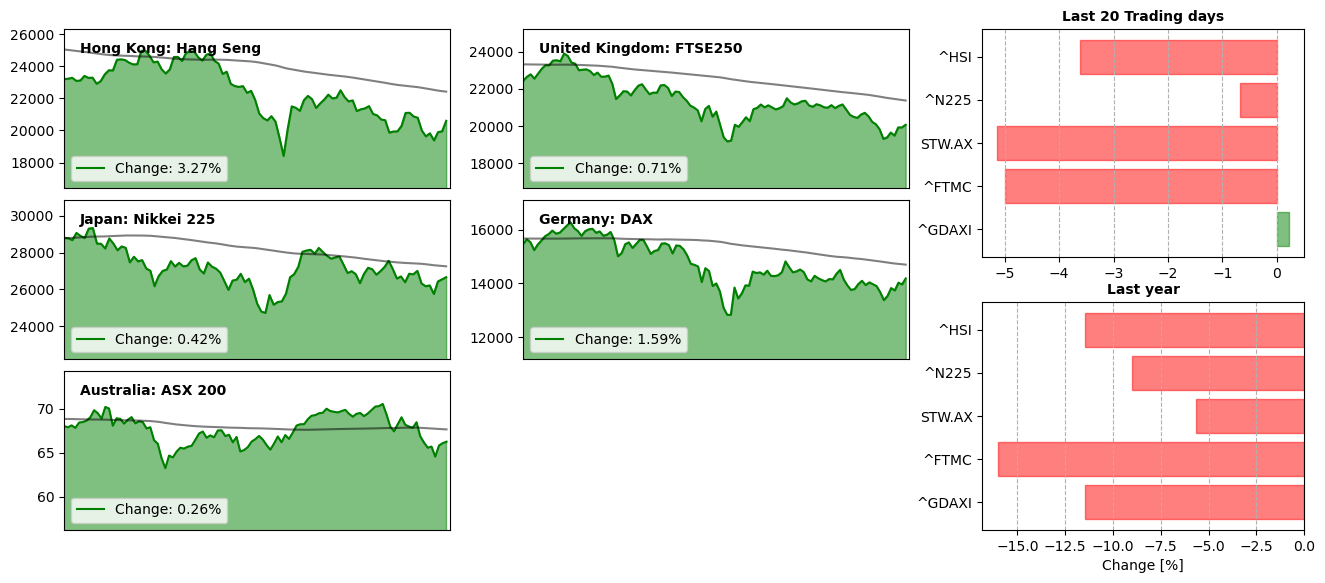

In [2]:
ms.worldmarkets()

***
## **US markets**
Spy = ETF following S&P500, IWM = ETF following Russell 2000
<br>
Follow the price action. How is the price and volume evolving? Any clear support or resistance soon? How is the new highs/new lows indicator acting compared to the overall market?

Last update done: 18-05-2022 at 08:26:48


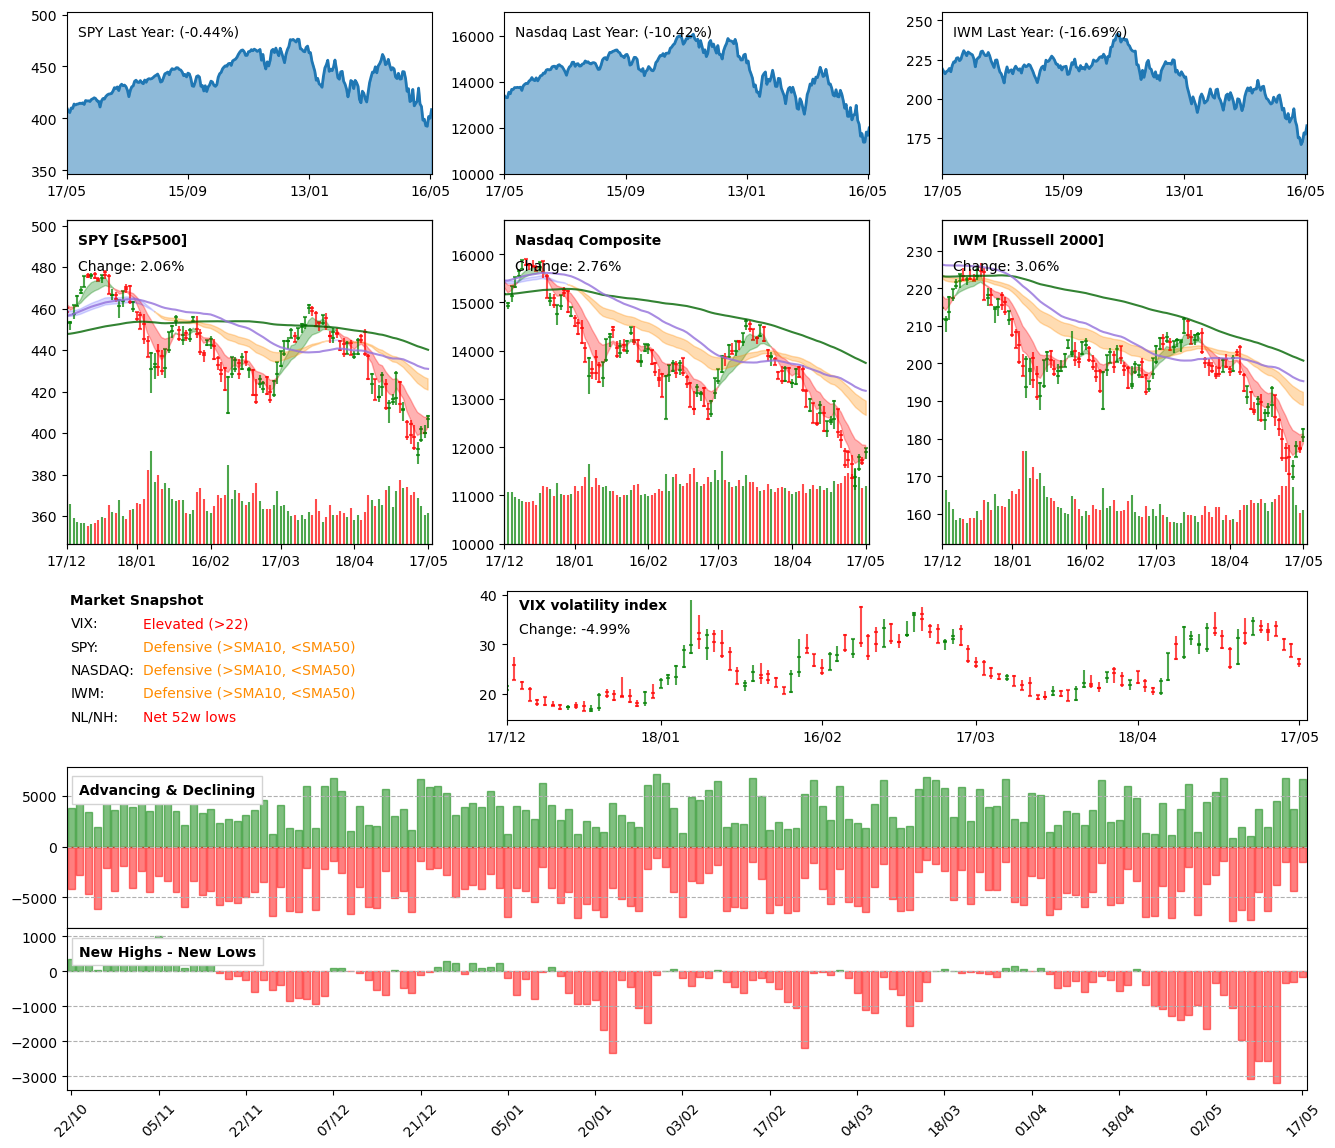

In [3]:
ms.usmarkets()

***
## **Sectors**
Explanations:
- Consumer Discretionary (cyclical) = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples (non-cyclical, defensive) = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

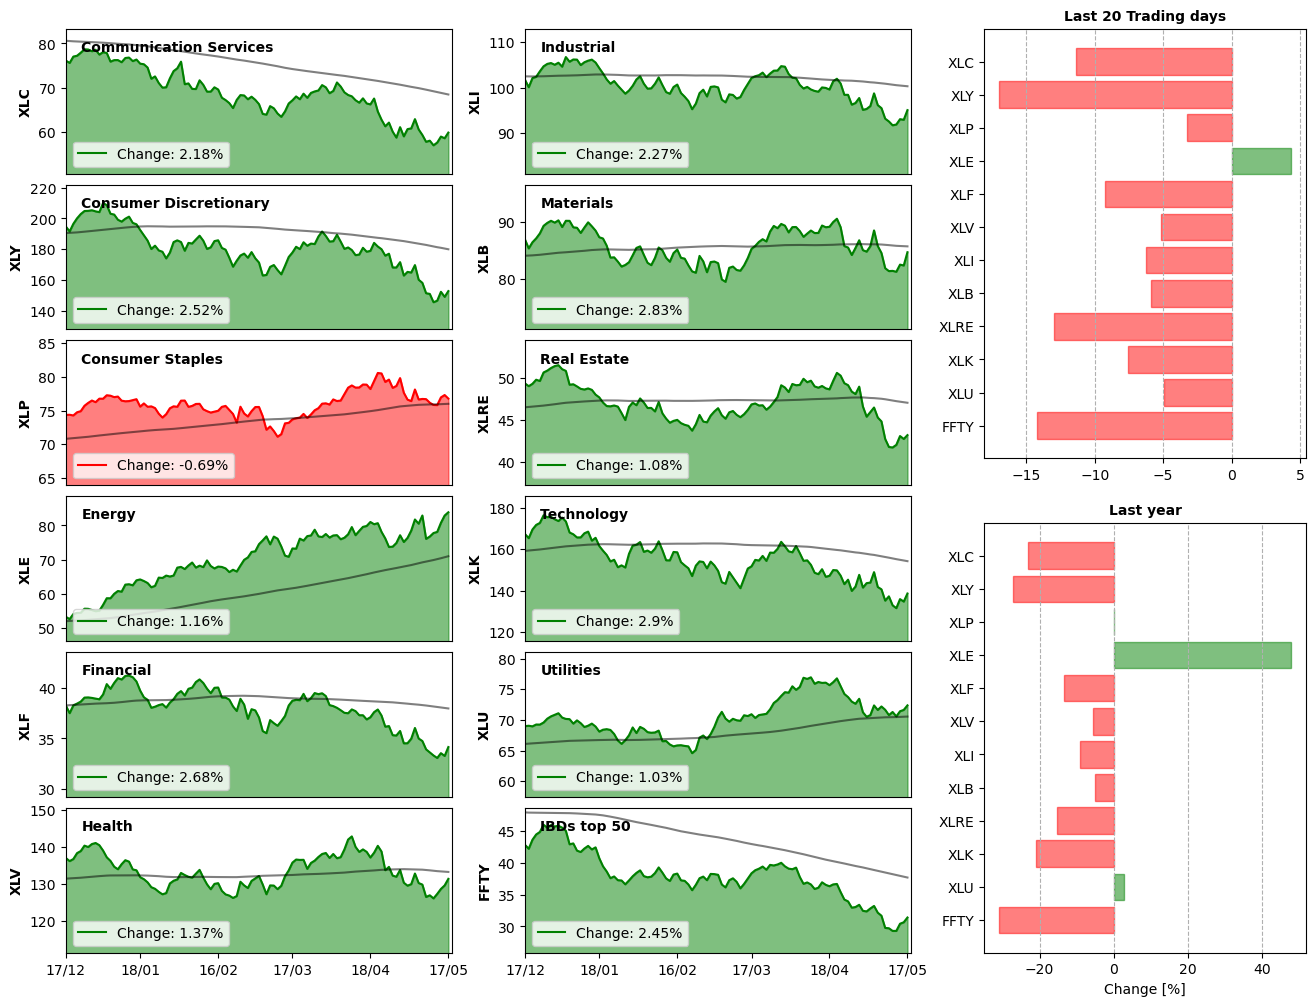

In [4]:
ms.sectors()

### Industries
Following tables are 20 best performing industries in last month followed by 10 worst performing indistries. Both tables are sorted by descending performance over last month.
<br>
Any industry shows relative strength compared to rest of the market? This could be potential winner for next cycle.

In [5]:
ind = ms.industries(sf=True, rank=True)
display_html(ind.prettify(ind.table.iloc[:20,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Electronics & Computer Distribution,4.21,14.42,1.26,5.26,1.39,2.21,0
Auto & Truck Dealerships,6.89,10.41,-18.39,-12.65,1.07,3.35,1
Oil & Gas Refining & Marketing,7.66,8.17,34.02,30.40,0.93,1.08,-1
Business Equipment & Supplies,4.50,7.37,-17.94,-12.06,0.72,2.93,2
Lumber & Wood Production,4.99,6.59,6.62,22.33,0.78,3.87,0
Trucking,0.28,4.28,-28.29,-9.72,1.01,3.99,8
Electronic Components,2.91,3.48,-17.04,-2.66,0.85,3.43,4
Utilities - Independent Power Producers,0.55,3.27,13.06,33.28,1.44,0.48,-4
Building Products & Equipment,4.69,3.07,-20.86,-9.09,0.98,2.73,3
Residential Construction,4.12,2.92,-23.01,-18.39,0.88,3.31,10


In [6]:
display_html(ind.prettify(ind.table.iloc[-10:,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Software - Application,1.86,-18.05,-49.87,-34.93,0.96,1.71,-1
Travel Services,3.09,-18.11,-29.12,-19.77,0.84,3.65,2
REIT - Industrial,1.46,-19.39,-13.68,9.81,1.05,0.12,-5
Internet Retail,6.49,-20.73,-41.08,-40.05,1.15,4.57,1
Gold,-2.22,-22.42,-6.20,-19.83,0.55,0.47,-2
Copper,2.15,-23.40,-4.44,-17.40,1.18,6.28,0
Uranium,10.70,-25.00,-22.37,11.03,0.99,6.24,3
Other Precious Metals & Mining,2.27,-25.61,-27.76,-44.65,0.69,2.50,-1
Aluminum,11.82,-27.30,-4.18,-3.44,0.95,5.25,-1
Silver,3.04,-29.53,-29.64,-42.84,0.88,2.37,-1


In [7]:
display_html(ind.prettify2(ind.volumechange())._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Volprice product
Chemicals,7.47,0.65,-3.68,-6.05,2.94,4.01,11.789400
Electrical Equipment & Parts,6.05,-9.51,-37.89,-23.47,1.96,5.00,9.800000
Copper,2.15,-23.40,-4.44,-17.40,1.18,6.28,7.410400
"Furnishings, Fixtures & Appliances",1.29,1.31,-31.06,-37.35,2.47,2.88,7.113600
Electronic Gaming & Multimedia,13.73,-9.19,-50.32,-44.54,1.54,4.33,6.668200
Uranium,10.70,-25.00,-22.37,11.03,0.99,6.24,6.177600
Financial Conglomerates,3.58,-3.52,-18.14,-3.22,1.11,5.02,5.572200
Semiconductor Equipment & Materials,8.17,-1.46,-28.51,-8.10,0.98,5.41,5.301800
Internet Retail,6.49,-20.73,-41.08,-40.05,1.15,4.57,5.255500
Paper & Paper Products,11.17,0.29,11.16,-10.93,1.21,4.32,5.227200


***
## **Futures**
Selected commodities futures. 
Will add also column for a relative year performance, but currently scrapper has a problem that the ethanol returns Null value.

In [8]:
futures = ms.futures()
data_futures = futures.returnfutures()
display_html(futures.prettify(data_futures.iloc[:12,:])._repr_html_()+"\xa0\xa0\xa0"+futures.prettify(data_futures.iloc[12:,:])._repr_html_(), raw=True)

IndexError: list index out of range

***
## **Crypto & Forex**

In [ ]:
# outptut table with cryptos and their preformance in last day/week/month

***
## **New IPOs**
New companies on the market during the last month, look for interesting price changes or so

---
**Run check:** Checks if the code run well <br>
**Saving:** Following code is for saving the notebook into the HTML file for easy reading and sharing. Need to be done manually, when notebook finishes running!


In [ ]:
# run check

In [ ]:
# save
os.system("jupyter nbconvert --to html --template classic market_status.ipynb")

0